<a href="https://colab.research.google.com/github/strawndri/slaviero-suct-data-analysis/blob/main/Notebooks/refunds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# <font color="#127182" size=6>Estornos - Maio 2022</font>
---

## <font color="#127182">1. Importações</font>

### <font color="#127182">1.1 Bibliotecas</font>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### <font color="#127182">1.2 Bases de Dados</font>

In [13]:
dataset = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Data/estornos-maio.csv')
dataset.head()

,UH,Reserva,Descrição,Crédito,Débito,Valor,Data,Hora,Usuário,Qtde.,Motivo
0,107.0,57429723.0,DIARIA,-293.00,0.00,-293.00,5/1/2022,10:04:21 AM,RFELIZ,1,ERRO DO SISTEMA
1,208.0,57825777.0,STONE - MASTERCARD D,0.00,32.25,32.25,5/1/2022,1:48:40 AM,RFELIZ,1,ERRO DE LANÇAMENTO
2,510.0,57813205.0,DIFERENÇA DE DIARIA,-196.79,0.00,-196.79,5/1/2022,12:14:57 PM,RFELIZ,1,ERRO DE LANÇAMENTO
3,502.0,57837422.0,DIARIA,-196.24,0.00,-196.24,5/1/2022,11:24:00 PM,RFELIZ,1,ERRO DE LANÇAMENTO
4,510.0,57813205.0,DIFERENÇA DE DIARIA,-30.00,0.00,-30.00,5/1/2022,12:13:47 PM,RFELIZ,1,ERRO DE LANÇAMENTO


## <font color="#127182">2. Tratamento de Dados</font>

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UH         585 non-null    float64
 1   Reserva    592 non-null    float64
 2   Descrição  625 non-null    object 
 3   Crédito    625 non-null    float64
 4   Débito     625 non-null    float64
 5   Valor      625 non-null    float64
 6   Data       625 non-null    object 
 7   Hora       625 non-null    object 
 8   Usuário    625 non-null    object 
 9   Qtde.      625 non-null    int64  
 10  Motivo     625 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 53.8+ KB


In [29]:
new_columns = {
    'UH': 'UH',	
    'Reserva': 'reserva',
    'Descrição': 'descricao',
    'Crédito': 'credito',
    'Débito': 'debito',
    'Valor': 'valor',
    'Data': 'data',
    'Hora': 'hora',
    'Usuário': 'usuario',
    'Qtde.': 'quantidade',
    'Motivo': 'motivo'
}

dataset.rename(columns = new_columns, inplace = True)

## <font color="#127182">3. Funções utilizadas e variáveis</font>

In [28]:
palette = ['#0e6580']

In [48]:
def plot_config():
  sns.set_style('darkgrid')
  plt.figure(figsize=(15, 5))

In [49]:
def set_barplot(x, y, xlabel, ylabel, title, palette):

  plot_config()
  ax = sns.barplot(x, y, palette=palette)
  ax.set_title(title, fontsize = 18)
  ax.set_xlabel(xlabel, fontsize = 12)
  ax.set_ylabel(ylabel, fontsize = 12)

  ax

## <font color="#127182">4. Análise de Dados</font>

### <font color="#127182">4.1 Quantidade de estornos por usuário</font>

In [26]:
users_frequency = dataset.usuario.value_counts()
users = dataset.usuario.unique()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


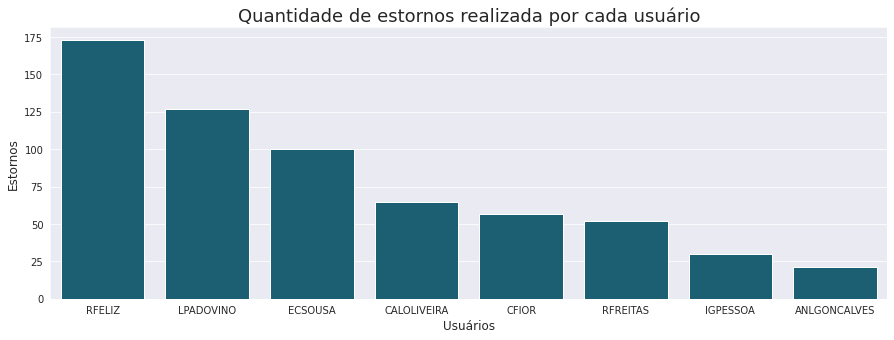

In [51]:
graphic = set_barplot(x=users, y=users_frequency, xlabel='Usuários', ylabel='Estornos', title='Quantidade de estornos realizada por cada usuário', palette=palette)
graphic